In [ ]:
### Imports ###
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer

## 1.1 Data Exploration
### 1.1.1

In [20]:
wine_df=pd.read_csv("WineQT.csv")


wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [21]:
# Info, like amount of entries, datatype and stuff
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [22]:
# Shows features and info about them
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### 1.1.2

Highest variance read from the statisti8cs show that both free sulfur dioxide and total sulfur dioxide, with that one being the higher one, have a high variance. This can be read from the std(Standard Deviation) row. Excluding Id as that is not a feature of the wine.

## 1.2 Correlation Analysis
### 1.2.1

In [ ]:
# Correlation Matrix
winecorr = wine_df.corr()
winecorr

NameError: name 'wine_df' is not defined

### 1.2.2

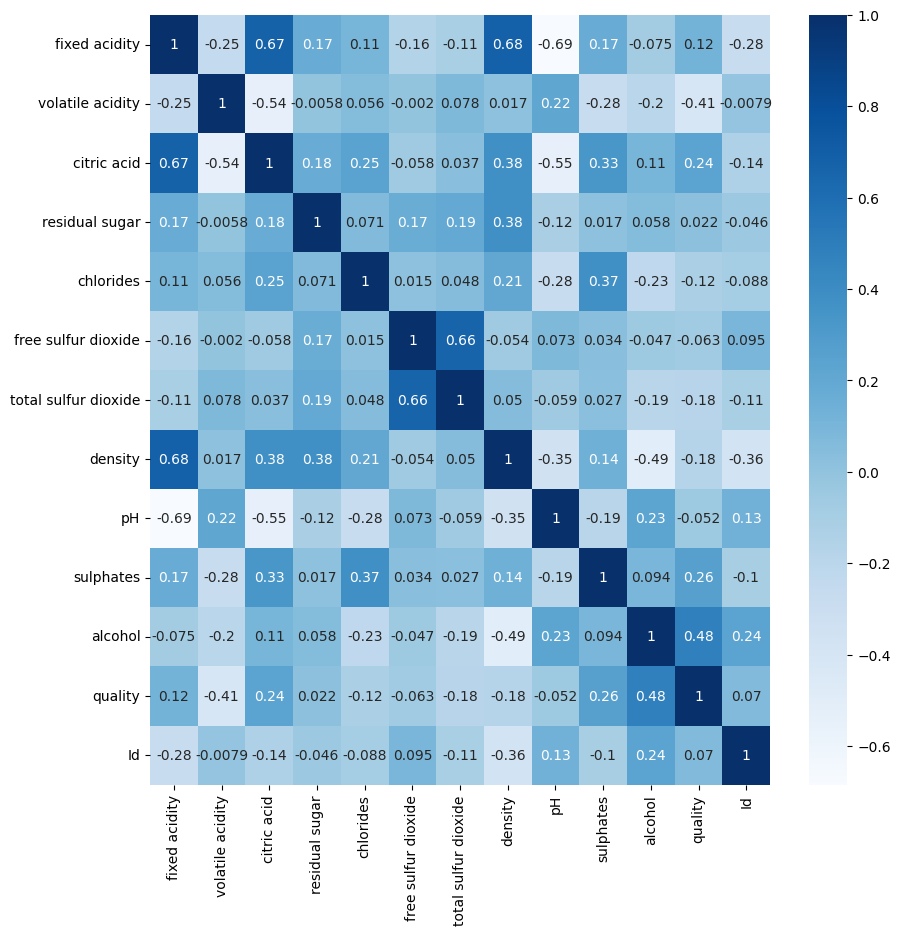

In [ ]:
# Heatmap correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(winecorr, cmap="Blues", annot=True, )

plt.show()

### 1.2.3
Reading from the heatmap, quality has strongest positive correlation with alcohol (0.48) and strongest negative correlation with volatile acidity (-0.41)

### 1.2.4
Since quality has a higher correlation with alcohol than pH, I expect alcohol to predict the wine quality. This is because the numbers suggests that alcohol contributes more to the variation in wine quality in the dataset, given the higher correlation, and thus more predictive power than pH

## 1.3 Linear Regression
### 1.3.1

Intercept: 5.671691943495344
Regression Coefficient: -0.17282395668538472
R^2: 0.002412795743836016


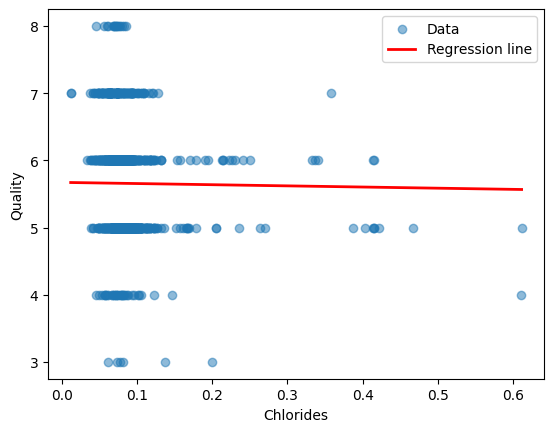

In [ ]:
X = wine_df[["chlorides"]].to_numpy()   
y = wine_df["quality"].to_numpy()       

X_b = np.c_[np.ones((len(X), 1)), X]    


eta = 0.001
n_iterations = 50_000
m = len(X_b)


np.random.seed(42)
theta = np.random.randn(2)           


costs = []
for _ in range(n_iterations):
    y_hat = X_b @ theta                 
    residuals = y_hat - y              
    gradients = (2 / m) * (X_b.T @ residuals) 
    theta -= eta * gradients
    costs.append(np.mean(residuals ** 2))


intercept, coef = float(theta[0]), float(theta[1])

# R^2 (coefficient of determination)
y_pred = X_b @ theta
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = float(1 - ss_res / ss_tot)

print(f"Intercept: {intercept}")
print(f"Regression Coefficient: {coef}")
print(f"R^2: {r2}")


# Scatter + regression line
plt.figure()
plt.scatter(X, y, alpha=0.5, label="Data")
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_line_b = np.c_[np.ones((len(x_line), 1)), x_line]
y_line = X_line_b @ theta
plt.plot(x_line, y_line, linewidth=2, label="Regression line", color="red")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.legend()
plt.show()


### 1.3.2

Intercept: 1.8870128607874057
Regression Coefficient: 0.3610409680042446
R^2 score: 0.2350952433535367


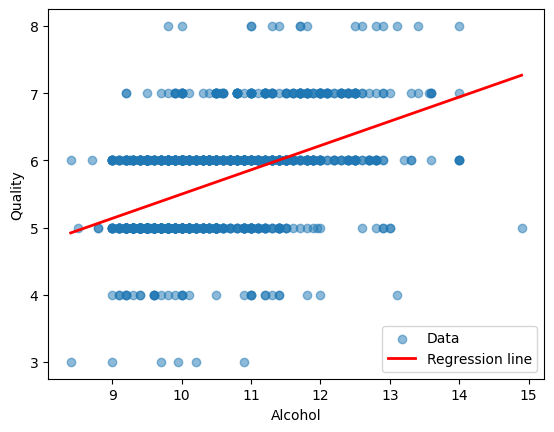

In [26]:
X = wine_df[["alcohol"]].values   # forklaringsvariabel
y = wine_df["quality"].values     # responsvariabel

# Modell
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Regression Coefficient:", model.coef_[0])
print("R^2 score:", model.score(X, y))

plt.scatter(X, y, alpha=0.5, label="Data")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.legend()
plt.show()

### 1.3.3

Using chlorides to predict quality in a gradient descent gives the values for intercept and regression coefficient:
 - Intercept: 5.671692691173761
 - Regression Coefficient: -0.17283253829536807

Using alcohol to predict quality gives the values:
 - Intercept: 1.8870128607874066
 - Regression Coefficient: 0.36104096800424457

This means that alcohol has more impact when predicting quality since, its a positive value, while the other is negative. The intercept gives the predicted value of quality if the variables used to predict is set to 0. The intercept of 5.6 for the chlorides model is close to the average wine quality (5–6), which makes sense since most wines in the dataset are around that level. 

### 1.3.4

Both lines fit the data points in the sense they make sense for those data points. However theres a big difference in how well the lines explain the data. 
The regression line for chlorides shows a weak downwards line. Since the R^2-score is low (R^2: 0.002412795743836016), whih means the line does not explain the data well

For alcohol its different. The points shows a clear trend to follow the line. The R^2-score is significantly higher (R^2 score: 0.2350952433535366), meaning the line explains the data well.

## 1.4


In [ ]:
# Samma splits
mask = wine_df[["alcohol", "quality"]].notna().all(axis=1) 
idx  = wine_df.index[mask].to_numpy()
kf   = KFold(n_splits=5, shuffle=True, random_state=42)
SPLITS = [(idx[tr], idx[te]) for tr, te in kf.split(idx)]

In [ ]:
def evaluate_gd_5fold(wine_df, feature, idx, splits,
                                  target="quality", eta0=0.001, max_iter=10000, tol=1e-6, seed=42):

  
    df_base = wine_df.loc[idx, [feature, target]]   
    X = df_base[[feature]].to_numpy(dtype=float)   
    y = df_base[target].to_numpy(dtype=float)

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("sgd", SGDRegressor(
            loss="squared_error",
            penalty=None,
            learning_rate="optimal",
            eta0=eta0,
            max_iter=max_iter,
            tol=tol,
            random_state=seed,
            fit_intercept=True
        ))
    ])

    scoring = {
        "mse": "neg_mean_squared_error",
        "rmse": "neg_root_mean_squared_error",
        "r2": "r2",
    }

    cvres = cross_validate(
        pipe, X, y,
        cv=splits,                  
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )

    mse  = -cvres["test_mse"]
    rmse = -cvres["test_rmse"]
    r2   =  cvres["test_r2"]

    res = pd.DataFrame({
        "fold": np.arange(1, len(mse)+1),
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

    print(f"\n=== {feature.upper()} : 5-fold test metrics ===")
    for i, (m, r, s) in enumerate(zip(mse, rmse, r2), 1):
        print(f"Fold {i}: MSE={m:.4f}, RMSE={r:.4f}, R2={s:.4f}")
    print(f"Mean : MSE={mse.mean():.4f}, RMSE={rmse.mean():.4f}, R2={r2.mean():.4f}")
    print(f"Var  : MSE={mse.var():.6f}, RMSE={rmse.var():.6f}, R2={r2.var():.6f}")

    return res



In [ ]:
res_alcohol   = evaluate_gd_5fold(wine_df, "alcohol",   idx, SPLITS,
                                              eta0=0.001, max_iter=10000, tol=1e-6, seed=42)

res_chlorides = evaluate_gd_5fold(wine_df, "chlorides", idx, SPLITS,
                                              eta0=0.001, max_iter=10000, tol=1e-6, seed=42)


=== ALCOHOL : 5-fold test metrics (SGDRegressor,) ===
Fold 1: MSE=0.4694, RMSE=0.6851, R2=0.1564
Fold 2: MSE=0.6730, RMSE=0.8204, R2=0.0860
Fold 3: MSE=0.5853, RMSE=0.7650, R2=0.1364
Fold 4: MSE=0.5958, RMSE=0.7719, R2=0.1271
Fold 5: MSE=0.5670, RMSE=0.7530, R2=0.0360
Mean : MSE=0.5781, RMSE=0.7591, R2=0.1084
Var  : MSE=0.004263, RMSE=0.001892, R2=0.001834

=== CHLORIDES : 5-fold test metrics (SGDRegressor,) ===
Fold 1: MSE=22.6298, RMSE=4.7571, R2=-39.6665
Fold 2: MSE=192.9547, RMSE=13.8908, R2=-261.0212
Fold 3: MSE=2.2129, RMSE=1.4876, R2=-2.2654
Fold 4: MSE=6216.7810, RMSE=78.8466, R2=-9106.8303
Fold 5: MSE=0.8031, RMSE=0.8961, R2=-0.3652
Mean : MSE=1287.0763, RMSE=19.9756, R2=-1882.0297
Var  : MSE=6080657.657620, RMSE=888.050343, R2=13058777.951856


### 1.4.1

## 1.5 Multiple Linear Regression

In [ ]:
def eval_all_features(wine_df, idx, splits, target="quality",
                                     eta0=0.001, max_iter=10000, tol=1e-6, seed=42):
    feature_cols = [c for c in wine_df.columns if c != target]
    df_base = wine_df.loc[idx, feature_cols + [target]]
    X = df_base[feature_cols].to_numpy(dtype=float)
    y = df_base[target].to_numpy(dtype=float)

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("sgd", SGDRegressor(
            loss="squared_error",
            penalty=None,               
            learning_rate="constant",   
            eta0=eta0,
            max_iter=max_iter,
            tol=tol,
            early_stopping=True,      
            validation_fraction=0.1,
            random_state=seed,
            fit_intercept=True
        ))
    ])

    scoring = {"mse":"neg_mean_squared_error",
               "rmse":"neg_root_mean_squared_error",
               "r2":"r2"}

    cvres = cross_validate(pipe, X, y, cv=splits, scoring=scoring,
                           n_jobs=-1, return_train_score=False)

    mse, rmse, r2 = -cvres["test_mse"], -cvres["test_rmse"], cvres["test_r2"]
    print("\n=== ALL FEATURES : 5-fold===")
    for i, (m,r,s) in enumerate(zip(mse, rmse, r2), 1):
        print(f"Fold {i}: MSE={m:.4f}, RMSE={r:.4f}, R2={s:.4f}")
    print(f"Mean : MSE={mse.mean():.4f}, RMSE={rmse.mean():.4f}, R2={r2.mean():.4f}")
    print(f"Var  : MSE={mse.var():.6f}, RMSE={rmse.var():.6f}, R2={r2.var():.6f}")

    return pd.DataFrame({"fold": np.arange(1, len(mse)+1), "MSE":mse, "RMSE":rmse, "R2":r2})


In [ ]:
res_all = eval_all_features(
    wine_df, idx, SPLITS,
    target="quality",
    eta0=0.001, max_iter=10000, tol=1e-6, seed=42
)
res_all


=== ALL FEATURES : 5-fold (SGDRegressor) ===
Fold 1: MSE=0.3868, RMSE=0.6220, R2=0.3048
Fold 2: MSE=0.4909, RMSE=0.7006, R2=0.3334
Fold 3: MSE=0.4351, RMSE=0.6596, R2=0.3580
Fold 4: MSE=0.4117, RMSE=0.6417, R2=0.3968
Fold 5: MSE=0.3762, RMSE=0.6134, R2=0.3605
Mean : MSE=0.4201, RMSE=0.6474, R2=0.3507
Var  : MSE=0.001667, RMSE=0.000964, R2=0.000935


,fold,MSE,RMSE,R2
0,1,0.386842,0.621966,0.304832
1,2,0.490867,0.700619,0.333432
2,3,0.435095,0.659617,0.357960
3,4,0.411735,0.641666,0.396792
4,5,0.376205,0.613356,0.360455


## PLOTS

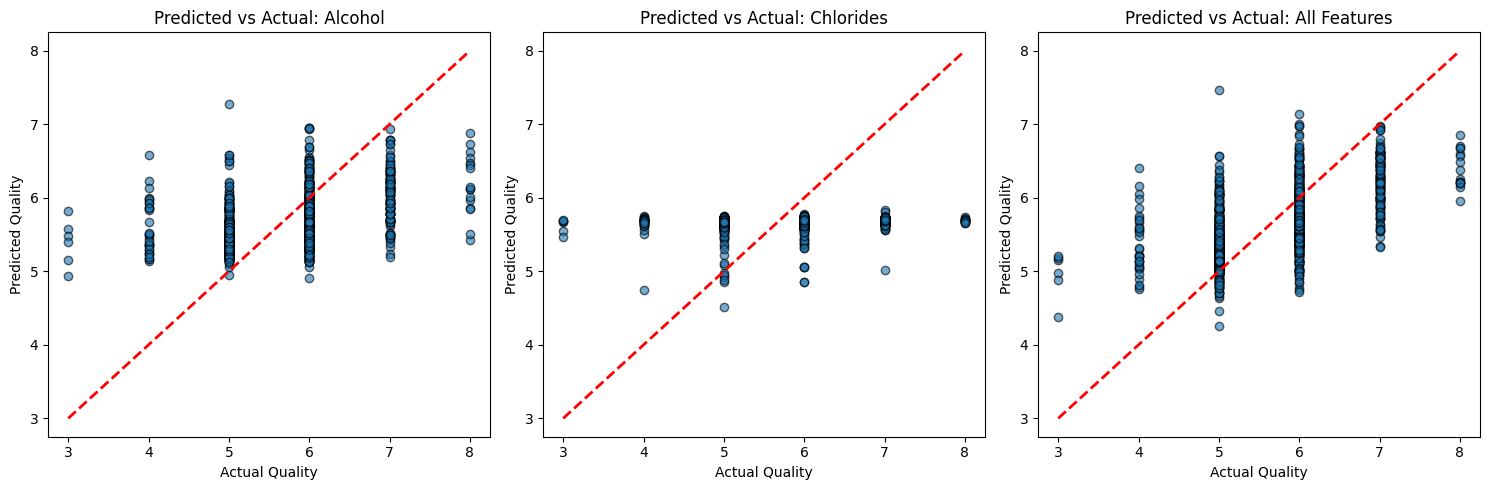

In [32]:
def predicted_vs_actual_all(wine_df, idx, splits, target="quality",
                            eta0=0.001, max_iter=10000, tol=1e-6, seed=42):

    feature_cols = [c for c in wine_df.columns if c != target]
    df_base = wine_df.loc[idx, feature_cols + [target]]
    X_all = df_base[feature_cols].to_numpy(float)
    y_all = df_base[target].to_numpy(float)

    def make_pipe():
        return Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler()),
            ("sgd", SGDRegressor(
                loss="squared_error",
                penalty=None,
                learning_rate="constant",
                eta0=eta0,
                max_iter=max_iter,
                tol=tol,
                random_state=seed,
                fit_intercept=True
            ))
        ])

    pipe_alcohol = make_pipe()
    pipe_chlorides = make_pipe()
    pipe_all = make_pipe()

    y_pred_alcohol, y_pred_chlorides, y_pred_all, y_true = [], [], [], []

    for tr, te in splits:
        y_tr, y_te = y_all[tr], y_all[te]
        y_true.extend(y_te)

        # alcohol only
        X_tr_a = X_all[tr, feature_cols.index("alcohol")].reshape(-1,1)
        X_te_a = X_all[te, feature_cols.index("alcohol")].reshape(-1,1)
        pipe_alcohol.fit(X_tr_a, y_tr)
        y_pred_alcohol.extend(pipe_alcohol.predict(X_te_a))

        # chlorides only
        X_tr_c = X_all[tr, feature_cols.index("chlorides")].reshape(-1,1)
        X_te_c = X_all[te, feature_cols.index("chlorides")].reshape(-1,1)
        pipe_chlorides.fit(X_tr_c, y_tr)
        y_pred_chlorides.extend(pipe_chlorides.predict(X_te_c))

        # all features
        X_tr, X_te = X_all[tr], X_all[te]
        pipe_all.fit(X_tr, y_tr)
        y_pred_all.extend(pipe_all.predict(X_te))

    y_true = np.array(y_true)
    y_pred_alcohol = np.array(y_pred_alcohol)
    y_pred_chlorides = np.array(y_pred_chlorides)
    y_pred_all = np.array(y_pred_all)

    # Plot
    plt.figure(figsize=(15,5))

    # Alcohol
    plt.subplot(1,3,1)
    plt.scatter(y_true, y_pred_alcohol, alpha=0.6, edgecolor="k")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             "r--", lw=2)
    plt.xlabel("Actual Quality")
    plt.ylabel("Predicted Quality")
    plt.title("Predicted vs Actual: Alcohol")

    # Chlorides
    plt.subplot(1,3,2)
    plt.scatter(y_true, y_pred_chlorides, alpha=0.6, edgecolor="k")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             "r--", lw=2)
    plt.xlabel("Actual Quality")
    plt.ylabel("Predicted Quality")
    plt.title("Predicted vs Actual: Chlorides")

    # All features
    plt.subplot(1,3,3)
    plt.scatter(y_true, y_pred_all, alpha=0.6, edgecolor="k")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             "r--", lw=2)
    plt.xlabel("Actual Quality")
    plt.ylabel("Predicted Quality")
    plt.title("Predicted vs Actual: All Features")

    plt.tight_layout()
    plt.show()

predicted_vs_actual_all(wine_df, idx, SPLITS, target="quality")

## Exercise 2.0
### 2.1

In [ ]:
X = wine_df.drop(columns=["quality", "Id"])
y = wine_df["quality"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = LinearRegression()
model.fit(X_scaled, y)


importance = pd.Series(abs(model.coef_), index=X.columns).sort_values(ascending=False)
print(importance)


alcohol                 0.303037
volatile acidity        0.202735
sulphates               0.149068
total sulfur dioxide    0.091256
chlorides               0.080705
pH                      0.063923
fixed acidity           0.040133
density                 0.033576
citric acid             0.025924
free sulfur dioxide     0.024277
residual sugar          0.018313
dtype: float64


### 2.1 
a:

In [ ]:
def eval_quadratic(wine_df, idx, SPLITS, target="quality",
                                    eta0=0.001, max_iter=20000, tol=1e-6, seed=42):
    feats = [c for c in wine_df.columns if c != target]
    base  = wine_df.loc[idx, feats + [target]]
    X     = base[feats].to_numpy(float)
    y     = base[target].to_numpy(float)

    pipe_quad = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("stack", FeatureUnion([
            ("id", FunctionTransformer(lambda Z: Z, validate=False)),     
            ("sq", FunctionTransformer(lambda Z: Z**2, validate=False)),  
        ])),
        ("scaler", StandardScaler()),
        ("sgd", SGDRegressor(
            loss="squared_error", penalty=None,
            learning_rate="constant", eta0=eta0,
            max_iter=max_iter, tol=tol,
            early_stopping=True, validation_fraction=0.1,
            random_state=seed, fit_intercept=True
        ))
    ])

    scoring = {"mse":"neg_mean_squared_error","rmse":"neg_root_mean_squared_error","r2":"r2"}
    cvres = cross_validate(pipe_quad, X, y, cv=SPLITS, scoring=scoring, n_jobs=-1, return_train_score=False)

    mse, rmse, r2 = -cvres["test_mse"], -cvres["test_rmse"], cvres["test_r2"]
    print("\n=== Quadratic ===")
    for i,(m,r,s) in enumerate(zip(mse, rmse, r2), 1):
        print(f"Fold {i}: MSE={m:.4f}, RMSE={r:.4f}, R2={s:.4f}")
    print(f"Mean : MSE={mse.mean():.4f}, RMSE={rmse.mean():.4f}, R2={r2.mean():.4f}")
    print(f"Var  : MSE={mse.var():.6f}, RMSE={rmse.var():.6f}, R2={r2.var():.6f}")

    return pd.DataFrame({"fold":np.arange(1,len(mse)+1),"MSE":mse,"RMSE":rmse,"R2":r2})


res_quad = eval_quadratic(wine_df, idx, SPLITS)


=== Quadratic ===
Fold 1: MSE=0.3876, RMSE=0.6226, R2=0.3035
Fold 2: MSE=0.4900, RMSE=0.7000, R2=0.3346
Fold 3: MSE=0.4584, RMSE=0.6770, R2=0.3236
Fold 4: MSE=0.4050, RMSE=0.6364, R2=0.4067
Fold 5: MSE=0.3805, RMSE=0.6169, R2=0.3531
Mean : MSE=0.4243, RMSE=0.6506, R2=0.3443
Var  : MSE=0.001823, RMSE=0.001053, R2=0.001231


B: Lasso/Ridge

In [ ]:
def eval_reg(wine_df, idx, SPLITS, target="quality",
                         model="ridge", alpha=1.0):
    feats = [c for c in wine_df.columns if c not in (target, "Id")]
    base  = wine_df.loc[idx, feats + [target]]
    X_all = base[feats].to_numpy(float)
    y_all = base[target].to_numpy(float)

    reg = Ridge(alpha=alpha, random_state=None) if model=="ridge" else Lasso(alpha=alpha, max_iter=10000, random_state=None)

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("reg", reg),
    ])

    mses, rmses, r2s = [], [], []
    l0_counts, l1_norms, l2_norms = [], [], []

    for tr, te in SPLITS:
        X_tr, X_te = X_all[tr], X_all[te]
        y_tr, y_te = y_all[tr], y_all[te]

        pipe.fit(X_tr, y_tr)
        y_pred = pipe.predict(X_te)

        mse = mean_squared_error(y_te, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_te, y_pred)
        mses.append(mse); rmses.append(rmse); r2s.append(r2)

        beta = pipe.named_steps["reg"].coef_
        l0_counts.append(np.count_nonzero(beta))
        l1_norms.append(np.sum(np.abs(beta)))
        l2_norms.append(np.linalg.norm(beta))

    print(f"\n=== {model.upper()} (alpha={alpha:g}) — same splits ===")
    for i,(m,r,s) in enumerate(zip(mses, rmses, r2s),1):
        print(f"Fold {i}: MSE={m:.4f}, RMSE={r:.4f}, R2={s:.4f}")
    print(f"Mean : MSE={np.mean(mses):.4f}, RMSE={np.mean(rmses):.4f}, R2={np.mean(r2s):.4f}, "
          f"nonzero={np.mean(l0_counts):.1f}, ||β||₁={np.mean(l1_norms):.3f}, ||β||₂={np.mean(l2_norms):.3f}")

    return pd.DataFrame({
        "fold": np.arange(1, len(mses)+1),
        "MSE": mses, "RMSE": rmses, "R2": r2s,
        "nonzero": l0_counts, "L1_norm": l1_norms, "L2_norm": l2_norms
    })


res_ridge = eval_reg(wine_df, idx, SPLITS, model="ridge", alpha=1.0)
res_lasso = eval_reg(wine_df, idx, SPLITS, model="lasso", alpha=0.001)



=== RIDGE (alpha=1) — same splits ===
Fold 1: MSE=0.3799, RMSE=0.6163, R2=0.3173
Fold 2: MSE=0.4841, RMSE=0.6958, R2=0.3426
Fold 3: MSE=0.4300, RMSE=0.6557, R2=0.3655
Fold 4: MSE=0.4103, RMSE=0.6405, R2=0.3990
Fold 5: MSE=0.3783, RMSE=0.6151, R2=0.3568
Mean : MSE=0.4165, RMSE=0.6447, R2=0.3563, nonzero=11.0, ||β||₁=1.035, ||β||₂=0.425

=== LASSO (alpha=0.001) — same splits ===
Fold 1: MSE=0.3790, RMSE=0.6157, R2=0.3189
Fold 2: MSE=0.4841, RMSE=0.6958, R2=0.3427
Fold 3: MSE=0.4299, RMSE=0.6556, R2=0.3657
Fold 4: MSE=0.4106, RMSE=0.6407, R2=0.3985
Fold 5: MSE=0.3783, RMSE=0.6151, R2=0.3569
Mean : MSE=0.4164, RMSE=0.6446, R2=0.3565, nonzero=10.8, ||β||₁=1.009, ||β||₂=0.424


C: Decision Tree

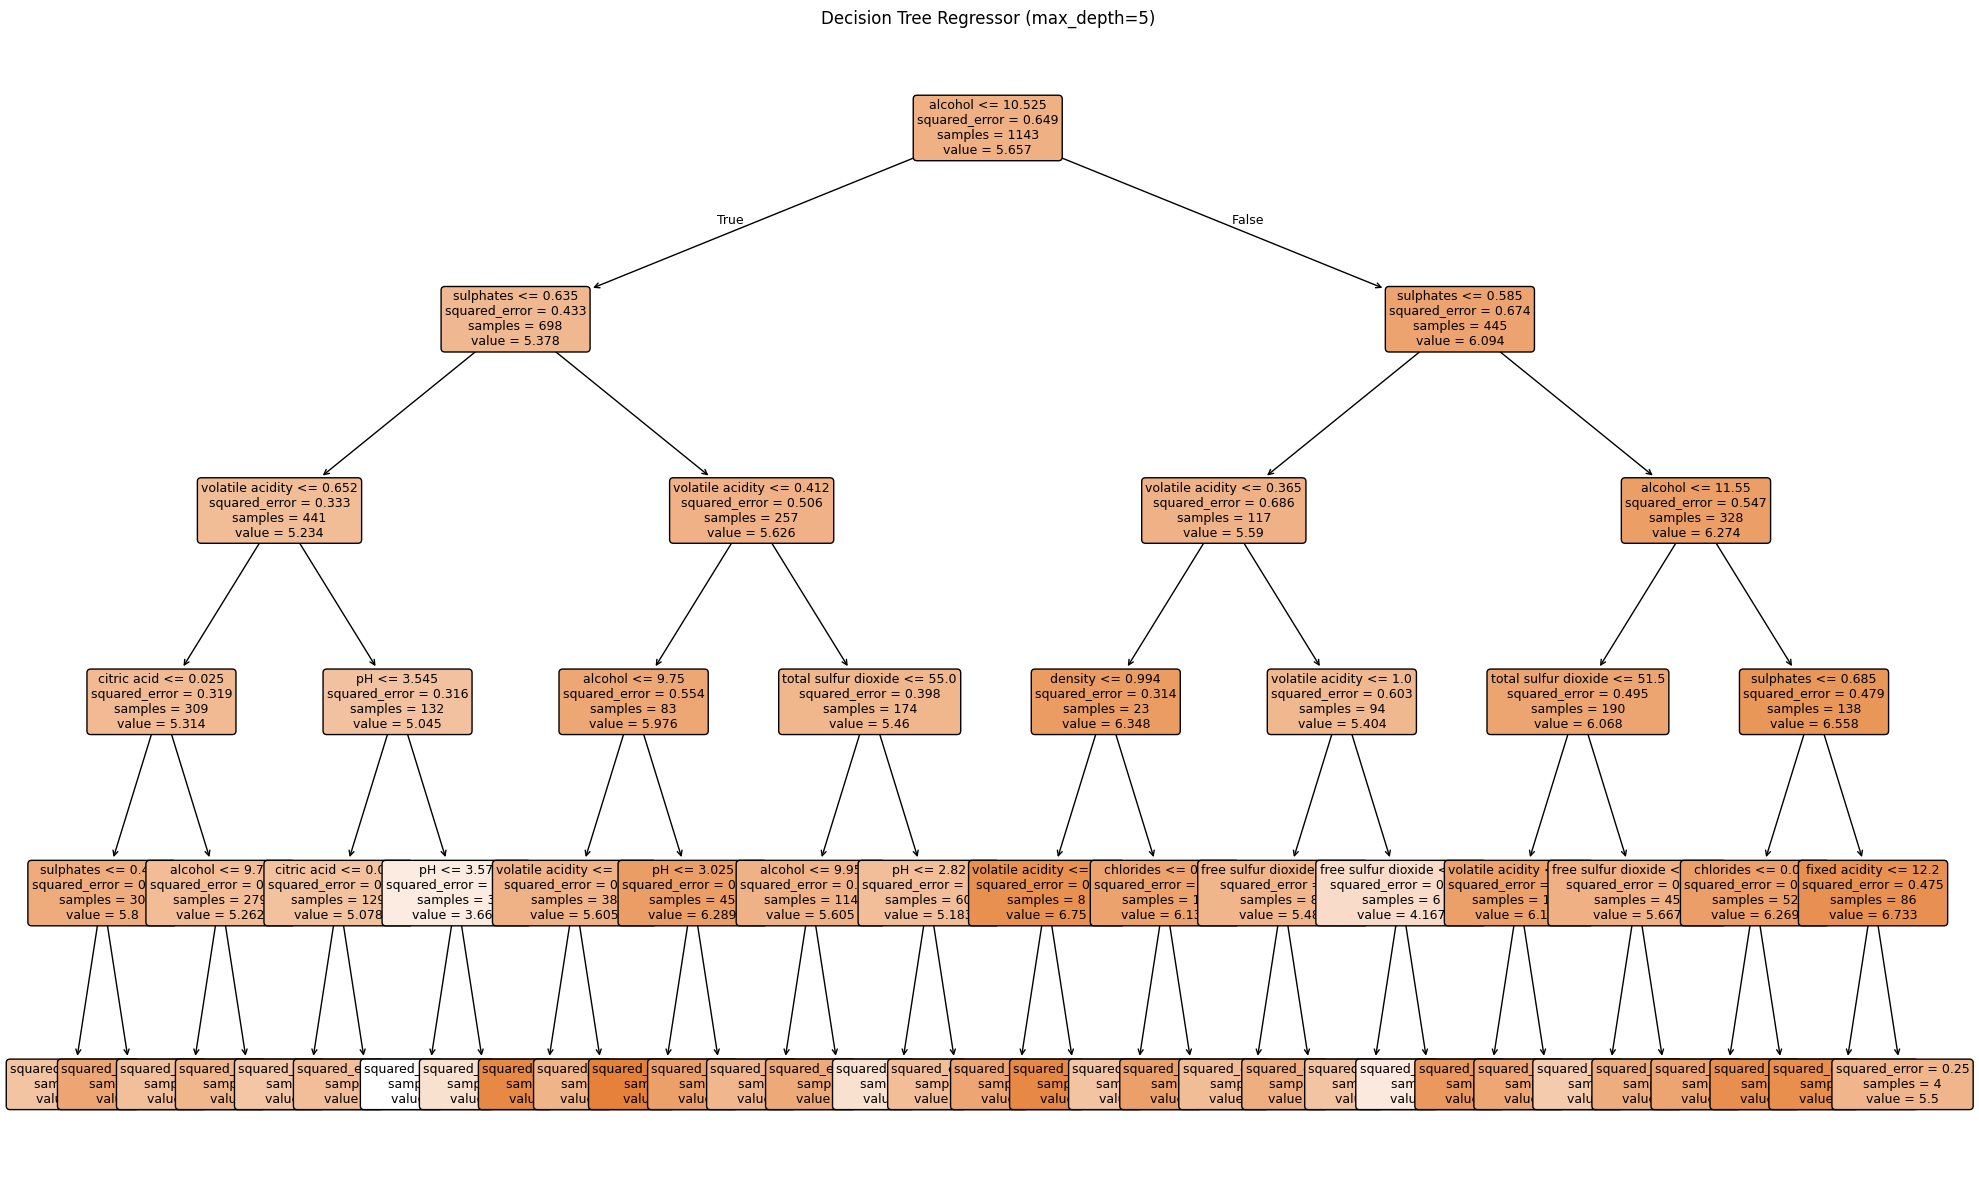

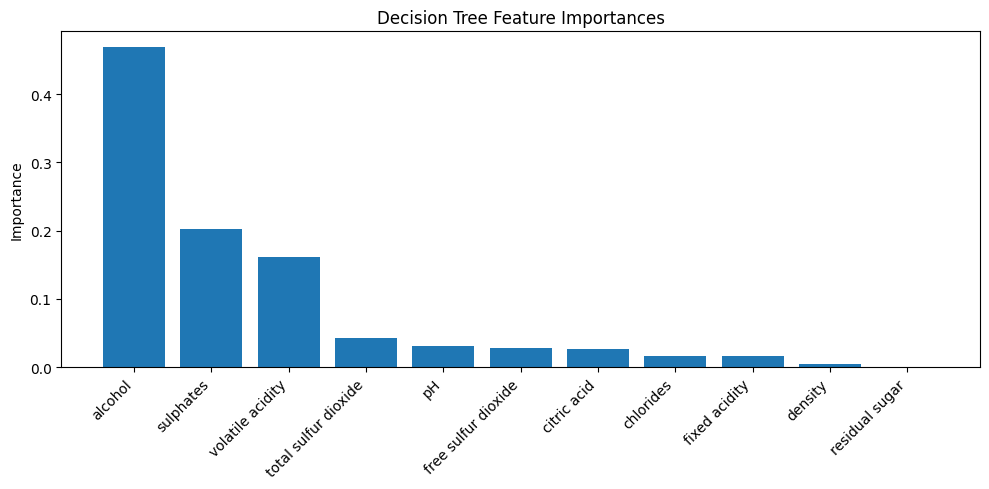

In [36]:
feats = [c for c in wine_df.columns if c not in ("quality", "Id")]
base  = wine_df.loc[idx, feats + ["quality"]]
X = base[feats].to_numpy(float)
y = base["quality"].to_numpy(float)


tree_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="mean")),
    ("tree", DecisionTreeRegressor(max_depth=5, random_state=42))
])
tree_pipe.fit(X, y)
tree = tree_pipe.named_steps["tree"]


plt.figure(figsize=(20, 12))
plot_tree(
    tree,
    feature_names=feats,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree Regressor (max_depth=5)")
plt.tight_layout()
plt.show()


importances = tree.feature_importances_
order = np.argsort(importances)[::-1]  

plt.figure(figsize=(10, 5))
plt.bar(range(len(feats)), importances[order])
plt.xticks(range(len(feats)), [feats[i] for i in order], rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.show()
